In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [2]:
data = pd.read_csv("Supriya.csv")
print("✅ Dataset loaded successfully!\n")
print(data.head())

✅ Dataset loaded successfully!

   YearsExperience  Unnamed: 1  Salary
0              0.8         NaN   30000
1              1.0         NaN   32000
2              1.2         NaN   35000
3              1.5         NaN   37000
4              2.0         NaN   40000


In [4]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 YearsExperience     0
Unnamed: 1         30
Salary              0
dtype: int64


In [5]:
X = data[['YearsExperience']]
y = data['Salary']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
print("\n🔹 Model Evaluation 🔹")
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


🔹 Model Evaluation 🔹
Intercept (b0): 23897.192708087197
Coefficient (b1): 8588.964172012147
R² Score: 0.9991508576129972
Mean Squared Error: 582511.6774839844


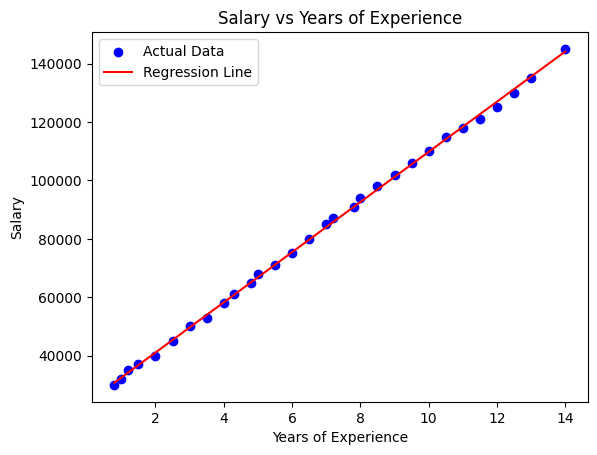

In [9]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [10]:
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [11]:
print("\n Model saved successfully as 'salary_model.pkl'")


 Model saved successfully as 'salary_model.pkl'


In [12]:
with open('salary_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [13]:
exp = float(input("Enter Years of Experience: "))
pred_salary = loaded_model.predict([[exp]])
print(f"\n Predicted Salary for {exp} years of experience: ₹{pred_salary[0]:.2f}")

Enter Years of Experience: 56

 Predicted Salary for 56.0 years of experience: ₹504879.19


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
